# Checking $\alpha$

In [18]:
# imports
from importlib import reload

import numpy as np

from ulmo import io as ulmo_io
from ulmo.plotting import plotting
from ulmo.utils import image_utils
from ulmo.analysis import fft

# Load the Table

In [2]:
tbl_file = '/data/Projects/Oceanography/AI/OOD/SST/MODIS_L2/Tables/MODIS_SSL_96clear_v4_DT1.parquet'

In [3]:
modis_tbl = ulmo_io.load_main_table(tbl_file)

Read main table: /data/Projects/Oceanography/AI/OOD/SST/MODIS_L2/Tables/MODIS_SSL_96clear_v4_DT1.parquet


In [5]:
modis_tbl.head()

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,...,zonal_slope,merid_slope,zonal_slope_err,merid_slope_err,ulmo_pp_type,DT40,ulmo_pp_idx,ulmo_pp_file,US0,US1
0,13.980967,62.675774,517,2003-03-10 21:25:00,520.178711,304,0.000000,26.199476,25.250000,26.885000,...,-1.186275,-2.126147,0.137467,0.224244,0,0.577624,0,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,0.664701,-0.373816
3,-11.910899,129.427200,485,2003-10-11 16:40:00,282.105896,1040,0.011414,28.777988,27.719999,30.639999,...,-1.793924,-1.593005,0.141151,0.189891,0,0.583875,5,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,6.799085,-0.713735
4,-20.774708,-37.858100,805,2003-09-21 03:55:00,283.446045,1488,0.025513,23.811947,22.709999,25.090000,...,-1.517568,-0.909913,0.099380,0.306343,0,0.537749,6,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,7.960623,1.304506
5,-29.013840,-123.112976,517,2003-01-04 09:20:00,192.348022,976,0.020508,23.734558,21.215000,24.734999,...,-1.409720,-2.198193,0.081723,0.143971,0,0.776376,7,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,4.341159,1.622166
6,11.424337,-19.698378,677,2003-03-21 02:55:00,345.454712,1901,0.022400,23.052279,21.209999,24.504999,...,-2.580862,-1.744191,0.143034,0.202087,0,0.738875,9,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,-0.416886,2.344963


# Grab a cutout with large-scale features

In [32]:
U0, U1 = 1, -1.8

i_large = np.argmin(np.abs((modis_tbl.US0-U0)**2 + (modis_tbl.US1-U1)**2))

In [33]:
large_cutout = modis_tbl.iloc[i_large]
large_cutout

lat                                                          2.557818
lon                                                        -156.83882
col                                                               773
datetime                                          2006-07-27 12:05:00
LL                                                         475.993042
row                                                              1648
clear_fraction                                               0.026733
mean_temperature                                            27.910484
Tmin                                                        25.724998
Tmax                                                           28.855
T90                                                         28.299999
T10                                                         27.555124
filename                         AQUA_MODIS.20060727T120508.L2.SST.nc
UID                                                 11549255782316118
pp_file             

## Show it

In [34]:
large_img = image_utils.grab_image(large_cutout)

<AxesSubplot: >

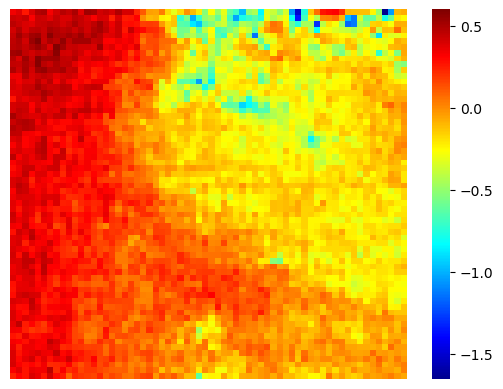

In [35]:
reload(plotting)
plotting.show_image(large_img)

## Calculate alpha

In [36]:
large_zonal_results, large_merid_results = fft.analyze_cutout(large_img)

In [37]:
large_zonal_results['slope_large'], large_merid_results['slope_large']

(-1.1499106946181936, -1.047525050068233)

----

# Now in the center of the UMAP

In [25]:
U0, U1 = 3, 2.

i_center = np.argmin(np.abs((modis_tbl.US0-U0)**2 + (modis_tbl.US1-U1)**2))

## Cutout and image

In [26]:
center_cutout = modis_tbl.iloc[i_center]
center_img = image_utils.grab_image(center_cutout)

In [31]:
center_cutout.zonal_slope

-2.1281297134870374

<AxesSubplot: >

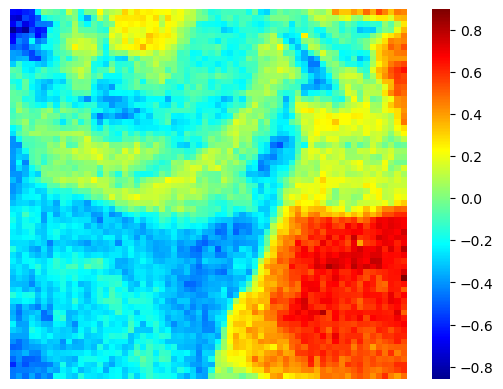

In [27]:
plotting.show_image(center_img)

## Alpha

In [28]:
center_zonal_results, center_merid_results = fft.analyze_cutout(center_img)

In [29]:
center_zonal_results['slope_large'], center_merid_results['slope_large']

(-2.1281298143297187, -1.6556604469543565)